# Лабараторная №1. Основый предобработки данных 

Используйте файл своей группы. <br>
Загрузите его в DataFrame и ответьте на вопросы, используя инстурменты из файла preprocessing.ipynb.


#### Воспросы
1. В какой шкале представлены все признаки в наборе?<br>
2. Укажите признак с наименьшей дисперсией.<br>
3. Среднее какого признака отличается для двух классов сильнее всего?<br>
4. В каком классе больше всего skilled работников?<br>
5. Есть ли в наборе признаки с выбросами? Какие?<br>
6. Сколько пропущенных значений в наборе?<br>
7. Попытайтесь заполнить пропущенные значения.<br>
8. Как минимум для одного признака каждого типа постройте диаграмму, которая может помочь его исследовать.<br>
9. Проанализируйте взаимосвязи признаков с помощью scatter-plot матрицы и тепловой карты корреляций. Какие выводы можно сделать?<br>
10. Какой признак(и) имеет смысл стандартизировать? Почему?<br>
11. Придумайте 1 новый признак, попытайтесь объяснить, почему он информативный.<br>

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

from sklearn import datasets
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

np.set_printoptions(precision=3)
pd.set_option('precision', 3)

sns.set()

**Загрузка файла**

In [2]:
path='credit_3530903_70302.csv'
credit_df = pd.read_csv(path, index_col=0)

**Первичный анализ данных**

In [3]:
credit_df.shape

(501, 16)

In [4]:
credit_df.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,personal_status,property_magnitude,age,housing,existing_credits,job,num_dependents,foreign_worker,class
0,<0,6.0,critical/other existing credit,radio/tv,1169.0,no known savings,>=7,male single,real estate,67.0,own,2.0,skilled,1.0,yes,good
1,0<=X<200,48.0,existing paid,radio/tv,5951.0,<100,1<=X<4,female div/dep/mar,real estate,22.0,own,1.0,skilled,1.0,yes,bad
2,no checking,12.0,critical/other existing credit,education,2096.0,<100,4<=X<7,male single,real estate,49.0,own,1.0,unskilled resident,2.0,yes,good
3,<0,42.0,existing paid,furniture/equipment,7882.0,<100,4<=X<7,male single,life insurance,45.0,for free,1.0,skilled,2.0,yes,good
4,<0,24.0,delayed previously,new car,4870.0,<100,1<=X<4,male single,no known property,53.0,for free,2.0,skilled,2.0,yes,bad


In [5]:
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 501 entries, 0 to 500
Data columns (total 16 columns):
checking_status       501 non-null object
duration              501 non-null float64
credit_history        501 non-null object
purpose               501 non-null object
credit_amount         501 non-null float64
savings_status        501 non-null object
employment            501 non-null object
personal_status       501 non-null object
property_magnitude    501 non-null object
age                   501 non-null float64
housing               474 non-null object
existing_credits      501 non-null float64
job                   501 non-null object
num_dependents        501 non-null float64
foreign_worker        501 non-null object
class                 501 non-null object
dtypes: float64(5), object(11)
memory usage: 66.5+ KB


**Изучение признаков**

*1. В какой шкале представлены все признаки в наборе?*

cheking_status - номинальная<br>
duration - абсолютная<br>
credit_history - номинальная<br>
purpose - номинальная<br>
credit_amount - абсолютная<br>
savings_status - номинальная<br>
employment - номинальная<br>
personal_status - номинальная<br>
property_magnitude - номинальная<br>
age - абсолютная<br>
housing - номинальная<br>
existing_credits - абсолютная <br>
job - номинальная<br>
num_dependents - абсолютная<br>
foreign_worker - номинальная(бинарная)<br>
class - номинальная(бинарная)<br>

*2. Укажите признак с наименьшей дисперсией*

In [6]:
credit_df.var().idxmin()

'num_dependents'

*3. Среднее какого признака отличается для двух классов сильнее всего?*

Получим все данные по классам

In [7]:
credit_df.groupby(['class']).describe()

duration                                              credit_amount  \
         count    mean     std  min   25%   50%   75%   max         count   
class                                                                       
bad      137.0  25.255  13.425  6.0  12.0  24.0  36.0  60.0         137.0   
good     364.0  18.456  11.025  4.0  12.0  15.0  24.0  60.0         364.0   

                 ... existing_credits      num_dependents                     \
           mean  ...              75%  max          count   mean    std  min   
class            ...                                                           
bad    4806.358  ...              2.0  4.0          137.0  1.153  0.362  1.0   
good   2794.648  ...              2.0  4.0          364.0  1.140  0.348  1.0   

                           
       25%  50%  75%  max  
class                      
bad    1.0  1.0  1.0  2.0  
good   1.0  1.0  1.0  2.0  

[2 rows x 40 columns]

In [8]:
credit_df.groupby(['class']).mean()

,duration,credit_amount,age,existing_credits,num_dependents
class,,,,,
bad,25.255,4806.358,35.029,1.380,1.153
good,18.456,2794.648,35.821,1.398,1.140


**Ответ: credit_amount**

4. В каком классе больше всего skilled работников?

In [9]:
credit_df[credit_df['job'] == 'skilled'].groupby(['class']).count().max(axis=1).idxmax()

'good'

5. Есть ли в наборе признаки с выбросами? Какие?

In [10]:
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 501 entries, 0 to 500
Data columns (total 16 columns):
checking_status       501 non-null object
duration              501 non-null float64
credit_history        501 non-null object
purpose               501 non-null object
credit_amount         501 non-null float64
savings_status        501 non-null object
employment            501 non-null object
personal_status       501 non-null object
property_magnitude    501 non-null object
age                   501 non-null float64
housing               474 non-null object
existing_credits      501 non-null float64
job                   501 non-null object
num_dependents        501 non-null float64
foreign_worker        501 non-null object
class                 501 non-null object
dtypes: float64(5), object(11)
memory usage: 66.5+ KB


In [11]:
numericDF = credit_df.select_dtypes(include=['float64'])

<AxesSubplot:>

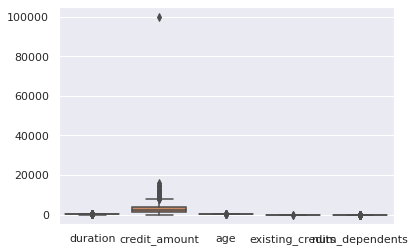

In [12]:
sns.boxplot(data = numericDF)

<AxesSubplot:xlabel='credit_amount'>

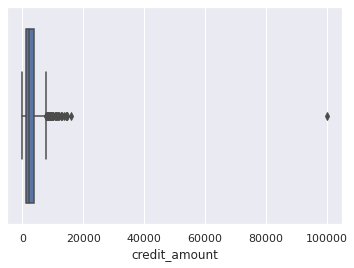

In [13]:
sns.boxplot(x='credit_amount',data = numericDF)

<AxesSubplot:xlabel='credit_amount'>

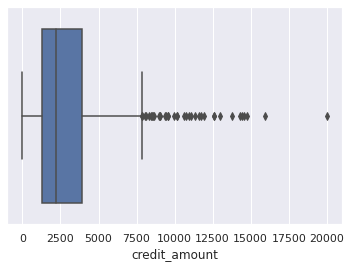

In [14]:
sns.boxplot(x='credit_amount',data = numericDF.clip(numericDF['credit_amount'].min(),20000))

<AxesSubplot:xlabel='duration'>

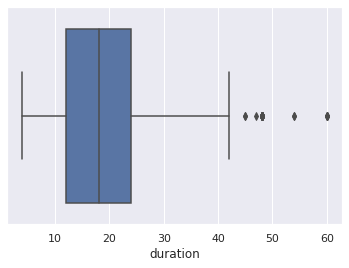

In [15]:
sns.boxplot(x='duration',data = numericDF)

<AxesSubplot:xlabel='age'>

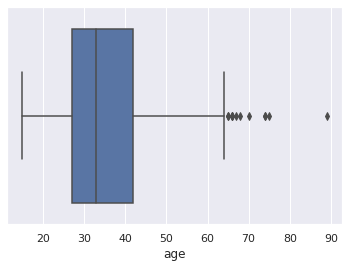

In [16]:
sns.boxplot(x='age',data = numericDF)

<AxesSubplot:xlabel='existing_credits'>

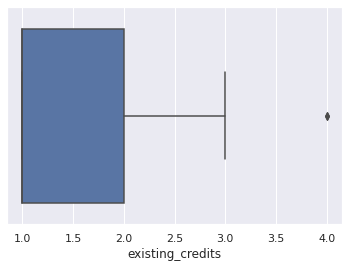

In [17]:
sns.boxplot(x='existing_credits',data = numericDF)

<AxesSubplot:xlabel='num_dependents'>

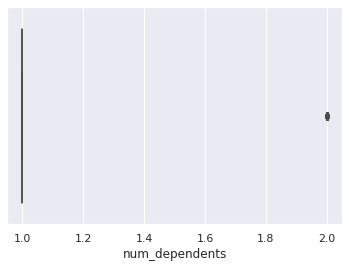

In [18]:
sns.boxplot(x='num_dependents',data = numericDF)

Ответ: Выброс в credit_amount, в других признаках есть выбросы, но они не так значительны

6. Сколько пропущенных значений в наборе?

In [19]:
credit_df.isna().sum().sum()

27

*7. Попытайтесь заполнить пропущенные значения.*

In [20]:
credit_df.isna().sum()

checking_status        0
duration               0
credit_history         0
purpose                0
credit_amount          0
savings_status         0
employment             0
personal_status        0
property_magnitude     0
age                    0
housing               27
existing_credits       0
job                    0
num_dependents         0
foreign_worker         0
class                  0
dtype: int64

In [21]:
credit_df.housing.drop_duplicates() 

0         own
3    for free
7        rent
8         NaN
Name: housing, dtype: object

In [22]:
credit_df['housing'].value_counts()

own         342
rent         82
for free     50
Name: housing, dtype: int64

In [23]:
credit_df.fillna('own')

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,personal_status,property_magnitude,age,housing,existing_credits,job,num_dependents,foreign_worker,class
0,<0,6.0,critical/other existing credit,radio/tv,1169.0,no known savings,>=7,male single,real estate,67.0,own,2.0,skilled,1.0,yes,good
1,0<=X<200,48.0,existing paid,radio/tv,5951.0,<100,1<=X<4,female div/dep/mar,real estate,22.0,own,1.0,skilled,1.0,yes,bad
2,no checking,12.0,critical/other existing credit,education,2096.0,<100,4<=X<7,male single,real estate,49.0,own,1.0,unskilled resident,2.0,yes,good
3,<0,42.0,existing paid,furniture/equipment,7882.0,<100,4<=X<7,male single,life insurance,45.0,for free,1.0,skilled,2.0,yes,good
4,<0,24.0,delayed previously,new car,4870.0,<100,1<=X<4,male single,no known property,53.0,for free,2.0,skilled,2.0,yes,bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
496,0<=X<200,36.0,existing paid,furniture/equipment,9034.0,100<=X<500,<1,male single,no known property,29.0,rent,1.0,high qualif/self emp/mgmt,1.0,yes,bad
497,no checking,24.0,critical/other existing credit,furniture/equipment,1585.0,<100,4<=X<7,male single,life insurance,40.0,own,2.0,skilled,1.0,yes,good
498,0<=X<200,18.0,existing paid,radio/tv,0.0,<100,>=7,male mar/wid,real estate,32.0,own,1.0,unskilled resident,1.0,yes,good
499,>=200,6.0,critical/other existing credit,new car,1323.0,100<=X<500,>=7,male div/sep,car,28.0,own,2.0,skilled,2.0,yes,good


*8. Как минимум для одного признака каждого типа постройте диаграмму, которая может помочь его исследовать*


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='duration', ylabel='Density'>

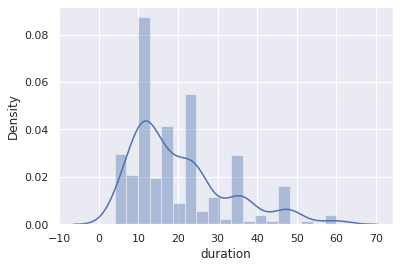

In [24]:
sns.distplot(numericDF['duration'])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

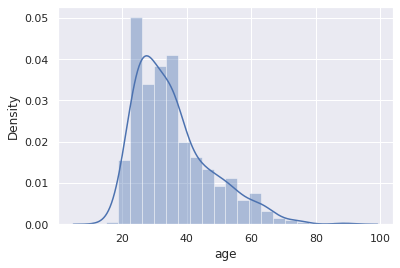

In [25]:
sns.distplot(numericDF['age'])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='credit_amount', ylabel='Density'>

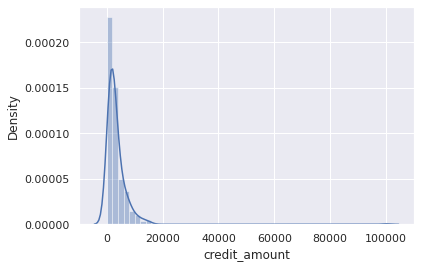

In [26]:
sns.distplot(numericDF['credit_amount'])

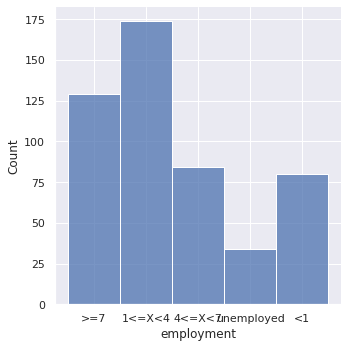

In [27]:
sns.displot(credit_df['employment'])

*9. Проанализируйте взаимосвязи признаков с помощью scatter-plot матрицы и тепловой карты корреляций. Какие выводы можно сделать?<br>*


In [28]:
corr_matrix = numericDF.corr()
corr_matrix

,duration,credit_amount,age,existing_credits,num_dependents
duration,1.000,3.103e-01,-3.665e-02,-0.031,-0.014
credit_amount,0.310,1.000e+00,4.936e-04,-0.015,-0.002
age,-0.037,4.936e-04,1.000e+00,0.152,0.106
existing_credits,-0.031,-1.471e-02,1.522e-01,1.000,0.107
num_dependents,-0.014,-1.590e-03,1.060e-01,0.107,1.000


<AxesSubplot:>

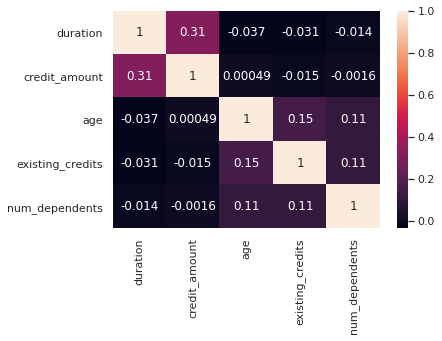

In [29]:
sns.heatmap(corr_matrix, annot=True, annot_kws={"size":12})

Первое Демонстрация очевидной связи между проолжительностью времени выплаты кредита и его стоимостью: разумно, чем больше сумма тем дольше выплачивать<br>
Второе не менее очевидное заявление чем старше человек, тем больше у него было возможностей взять кредит и завсети детей

*10. Какой признак(и) имеет смысл стандартизировать? Почему?<br>*


Можно стандартизоровать можно credit_amount. 

*11. Придумайте 1 новый признак, попытайтесь объяснить, почему он информативный.<br>*